In [18]:
import pandas as pd 
from pandas import DataFrame
from tweepy.streaming import StreamListener
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import os
import csv
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
os.getcwd()

'/Volumes/Damian/NJIT_Clases/CS644_Big_Data/Final_Project'

In [20]:
train = pd.read_csv('tweeter_train.csv' ,header=None)
train.rename(columns={0: 'Polarity', 1: 'ID', 2: 'Date',3: 'Query',4: 'User',5: 'Tweet'}, inplace=True)
del train["Query"]

train.drop(train.index[200000:1400000], inplace = True)

#train.drop(train.tail(700000).index, inplace = True)
train

,Polarity,ID,Date,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [21]:
train.dtypes

Polarity     int64
ID           int64
Date        object
User        object
Tweet       object
dtype: object

In [22]:
test = pd.read_csv('tweeter_test.csv' ,encoding='latin-1',header=None)
test.rename(columns={0: 'ID', 1: 'Date', 2: 'Tweet',3: 'User',4: 'Location'}, inplace=True)
test.head()
test.insert(len(test.columns), 'Polarity',np.nan)
del test["Location"]
test = test[['Polarity', 'ID', 'Date', 'User', 'Tweet']]

test.head()

,Polarity,ID,Date,User,Tweet
0,NaN,1389366309486567429,2021-05-03 23:48:36,flufferbot01,@RichardKeppler1 @PlugInFUD Covid canât stop...
1,NaN,1389366309306212369,2021-05-03 23:48:35,interzone03,@IrishNorsewoman @MollyJongFast Your 6 year ol...
2,NaN,1389366308404404224,2021-05-03 23:48:35,SecretNews,Rabbi disavowed by Chabad after posting âope...
3,NaN,1389366302746333184,2021-05-03 23:48:34,kenshixhimura,@elrosa_ Maaaan fuck covid
4,NaN,1389366302326861826,2021-05-03 23:48:34,connecticutvax,As of 05/03 19:48: New appointment(s) availabl...


In [23]:
features1 = test.iloc[:, 4].values
labels1 = test.iloc[:, 0].values
processed_features1 = []

for sentence in range(0, len(features1)):
    # Remove all the special characters
    processed_feature1 = re.sub(r'\W', ' ', str(features1[sentence]))

    # remove all single characters
    processed_feature1= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature1)

    # Remove single characters from the start
    processed_feature1 = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature1) 

    # Substituting multiple spaces with single space
    processed_feature1 = re.sub(r'\s+', ' ', processed_feature1, flags=re.I)

    # Removing prefixed 'b'
    processed_feature1 = re.sub(r'^b\s+', '', processed_feature1)

    # Converting to Lowercase
    processed_feature1 = processed_feature1.lower()

    processed_features1.append(processed_feature1)

6.0
4.0


<AxesSubplot:ylabel='Polarity'>

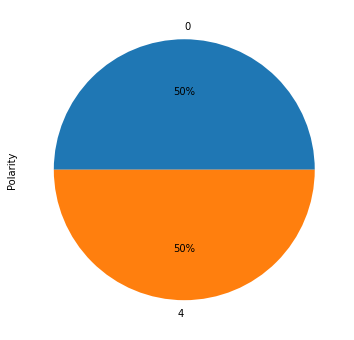

In [24]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
train.Polarity.value_counts().plot(kind='pie', autopct='%1.0f%%')


In [25]:
features = train.iloc[:, 4].values
labels = train.iloc[:, 0].values
labels

array([0, 0, 0, ..., 4, 4, 4])

In [26]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
#pip install sklearn

In [27]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)


In [13]:
from sklearn.ensemble import RandomForestClassifier

#text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
#text_classifier.fit(X_train, y_train)
#predictions = text_classifier.predict(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[44658 15640]
 [12685 47017]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     60298
           4       0.75      0.79      0.77     59702

    accuracy                           0.76    120000
   macro avg       0.76      0.76      0.76    120000
weighted avg       0.76      0.76      0.76    120000

0.7639583333333333


In [31]:
vectorizer1 = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features1 = vectorizer.fit_transform(processed_features1).toarray()

In [32]:
predictions1 = logmodel.predict(processed_features1)
test['Polarity'] = predictions1
test


,Polarity,ID,Date,User,Tweet
0,4,1389366309486567429,2021-05-03 23:48:36,flufferbot01,@RichardKeppler1 @PlugInFUD Covid canât stop...
1,0,1389366309306212369,2021-05-03 23:48:35,interzone03,@IrishNorsewoman @MollyJongFast Your 6 year ol...
2,0,1389366308404404224,2021-05-03 23:48:35,SecretNews,Rabbi disavowed by Chabad after posting âope...
3,0,1389366302746333184,2021-05-03 23:48:34,kenshixhimura,@elrosa_ Maaaan fuck covid
4,0,1389366302326861826,2021-05-03 23:48:34,connecticutvax,As of 05/03 19:48: New appointment(s) availabl...
...,...,...,...,...,...
18841,4,1389339895349477376,2021-05-03 22:03:38,KevinSMcArthur,15 more deaths from Covid-19 (3 periods)... ugh.
18842,4,1389339895194431492,2021-05-03 22:03:38,rubydeuxdetroit,@jenmonkey1 @jameshamblin @gtconway3dg You thi...
18843,0,1389339894615531526,2021-05-03 22:03:38,croft_55,@0_politics2 I guess cos covid is still rampan...
18844,4,1389339894552559616,2021-05-03 22:03:38,bc_news_addict,BC Covid Update:\nFri-Sat 835\nSat-Sun 671\nSu...


In [33]:
Final_TestDF = test.drop(['ID', 'Date', 'User'], axis=1, inplace=True)

In [38]:
test.head()

,Polarity,Tweet
0,4,@RichardKeppler1 @PlugInFUD Covid canât stop...
1,0,@IrishNorsewoman @MollyJongFast Your 6 year ol...
2,0,Rabbi disavowed by Chabad after posting âope...
3,0,@elrosa_ Maaaan fuck covid
4,0,As of 05/03 19:48: New appointment(s) availabl...


In [40]:
test.shape

(18846, 2)

In [42]:
# reduce the number of records to I can dump the data in the MySQL database.
TestDF_final = test.iloc[0:1000]

In [43]:
TestDF_final.head()

,Polarity,Tweet
0,4,@RichardKeppler1 @PlugInFUD Covid canât stop...
1,0,@IrishNorsewoman @MollyJongFast Your 6 year ol...
2,0,Rabbi disavowed by Chabad after posting âope...
3,0,@elrosa_ Maaaan fuck covid
4,0,As of 05/03 19:48: New appointment(s) availabl...


In [44]:
TestDF_final.shape

(1000, 2)

In [45]:
TestDF_final.to_csv('test_final_data.csv')

In [48]:
import string
string.punctuation
# Remove punctuation function
def removePunctuation(text):
    for eachPunct in string.punctuation:
        text = text.replace(eachPunct, '')
    return text

In [49]:
TestDF_final['Tweet'] = TestDF_final['Tweet'].apply(removePunctuation)

<ipython-input-49-d130e412cb9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestDF_final['Tweet'] = TestDF_final['Tweet'].apply(removePunctuation)


In [50]:
#tokenization to the tweet_text
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    text = word_tokenize(text.lower())
    return text

In [51]:
TestDF_final['Tweet'] = TestDF_final['Tweet'].apply(tokenize_text)

<ipython-input-51-6404c44810e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TestDF_final['Tweet'] = TestDF_final['Tweet'].apply(tokenize_text)


In [52]:
TestDF_final.head()

,Polarity,Tweet
0,4,"[richardkeppler1, pluginfud, covid, canât, s..."
1,0,"[irishnorsewoman, mollyjongfast, your, 6, year..."
2,0,"[rabbi, disavowed, by, chabad, after, posting,..."
3,0,"[elrosa, maaaan, fuck, covid]"
4,0,"[as, of, 0503, 1948, new, appointments, availa..."


In [53]:
TestDF_final.to_csv('test_final_data.csv')

In [55]:
#Convert file to HTML
#!jupyter nbconvert --execute --to html Tweets_LogModel.ipynb